In [1]:
print('f')

f


In [2]:
import sys
from scipy.io import mmread
from scipy.sparse import coo_matrix

# base packages
import sys
import pandas as pd
import numpy as np
import scipy as sp      
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import pickle
import adjustText

# velocity packages
import scanpy as sc
import scvelo as scv
import anndata as ann
import velvet as vt


Global seed set to 0
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/camp/home/maizelr/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [3]:
home = '/nemo/lab/briscoej/home/users/maizelr/transcriptomics/metabolic_labelling_datasets/'

In [4]:
sceu_rpe1 = sc.read_loom(home+'sceu/sceu_rpe1.loom')
sceu_rpe1.var_names_make_unique()
sceu_rpe1 = sceu_rpe1[sceu_rpe1.obs.Condition_Id=='Pulse_120']

In [5]:
%%time
nasc_seq = sc.read_loom(home+'nasc/nasc_full_data.loom')
nasc_seq.var_names_make_unique()

scif_hek = sc.read_loom(home+'scif/human_labelled_hek.loom')
scif_hek.var_names_make_unique()

scif_a54 = sc.read_loom(home+'scif/scifate_A549_data.loom')
scif_a54.var_names_make_unique()

rnav_mou = sc.read_loom('/nemo/lab/briscoej/home/users/maizelr/transcriptomics/mouse_transcriptomics_data/full_data/mouse_full_typed_velocity.loom')
rnav_mou.var_names_make_unique()

rnav_hum = sc.read_loom('/nemo/lab/briscoej/home/users/maizelr/transcriptomics/human_transcriptomics_analysis/data/human_full_typed_velocity.loom')
rnav_hum.var_names_make_unique()

nt_seq = sc.read_loom(home+'scnt/scnt-data.loom')
nt_seq.var_names_make_unique()


CPU times: user 3min 30s, sys: 59 s, total: 4min 29s
Wall time: 5min 15s


In [6]:
tf_genes = np.load('/nemo/lab/briscoej/home/users/maizelr/transcriptomics/gene_lists/putative_tfs.npy', allow_pickle=True)
tf_hum = [a.upper() for a in tf_genes]
tf_mou = [a for a in tf_genes]

In [ ]:
# %%time

# sc.pp.filter_cells(nasc_seq, min_genes=200)
# sc.pp.filter_genes(nasc_seq, min_cells=3)
# sc.pp.normalize_total(nasc_seq, layers='all')
# sc.pp.log1p(nasc_seq)
# nasc_seq = nasc_seq[np.random.randint(0,nasc_seq.shape[0]-1,400),:]

# sc.pp.filter_cells(scif_hek, min_genes=200)
# sc.pp.filter_genes(scif_hek, min_cells=3)
# sc.pp.normalize_total(scif_hek, layers='all')
# sc.pp.log1p(scif_hek)
# scif_hek = scif_hek[np.random.randint(0,scif_hek.shape[0]-1,400),:]

# sc.pp.filter_cells(scif_a54, min_genes=200)
# sc.pp.filter_genes(scif_a54, min_cells=3)
# sc.pp.normalize_total(scif_a54, layers='all')
# sc.pp.log1p(scif_a54)
# scif_a54 = scif_a54[np.random.randint(0,scif_a54.shape[0]-1,400),:]

# sc.pp.filter_cells(rnav_mou, min_genes=200)
# sc.pp.filter_genes(rnav_mou, min_cells=3)
# sc.pp.normalize_total(rnav_mou, layers='all')
# sc.pp.log1p(rnav_mou)
# rnav_mou = rnav_mou[np.random.randint(0,rnav_mou.shape[0]-1,400),:]

# sc.pp.filter_cells(rnav_hum, min_genes=200)
# sc.pp.filter_genes(rnav_hum, min_cells=3)
# sc.pp.normalize_total(rnav_hum, layers='all')
# sc.pp.log1p(rnav_hum)
# rnav_hum = rnav_hum[np.random.randint(0,rnav_hum.shape[0]-1,400),:]

# sc.pp.filter_cells(sceu_rpe1, min_genes=200)
# sc.pp.filter_genes(sceu_rpe1, min_cells=3)
# sc.pp.normalize_total(sceu_rpe1, layers='all')
# sc.pp.log1p(sceu_rpe1)
# sceu_rpe1 = sceu_rpe1[np.random.randint(0,sceu_rpe1.shape[0]-1,400),:]

# sc.pp.filter_cells(nt_seq, min_genes=200)
# sc.pp.filter_genes(nt_seq, min_cells=3)
# sc.pp.normalize_total(nt_seq, layers='all')
# sc.pp.log1p(nt_seq)
# nt_seq = nt_seq[np.random.randint(0,nt_seq.shape[0]-1,400),:]

In [7]:
%%time

nasc_seq = nasc_seq[np.random.randint(0,nasc_seq.shape[0]-1,400),vt.pp.select_genes(nasc_seq, n_variable_genes=2000)]
scif_hek = scif_hek[np.random.randint(0,scif_hek.shape[0]-1,400),vt.pp.select_genes(scif_hek, n_variable_genes=2000)]
scif_a54 = scif_a54[np.random.randint(0,scif_a54.shape[0]-1,400),vt.pp.select_genes(scif_a54, n_variable_genes=2000)]
rnav_mou = rnav_mou[np.random.randint(0,rnav_mou.shape[0]-1,400),vt.pp.select_genes(rnav_mou, n_variable_genes=2000)]
rnav_hum = rnav_hum[np.random.randint(0,rnav_hum.shape[0]-1,400),vt.pp.select_genes(rnav_hum, n_variable_genes=2000)]
sceu_rpe1 = sceu_rpe1[np.random.randint(0,sceu_rpe1.shape[0]-1,400),vt.pp.select_genes(sceu_rpe1, n_variable_genes=2000)]
nt_seq = nt_seq[np.random.randint(0,nt_seq.shape[0]-1,400),vt.pp.select_genes(nt_seq, n_variable_genes=2000)]



CPU times: user 14.9 s, sys: 10.3 s, total: 25.2 s
Wall time: 22.4 s


In [8]:
datas = [nasc_seq, scif_a54, rnav_mou, rnav_hum, sceu_rpe1, nt_seq]
names = ['NASC-seq: 4sU 50µM 1hr', 'SciFate: 4sU 200µM 2hr', 
         '10x RNAV Mouse', '10x RNAV Human','scEU-seq: EU 400µM 2hr', 'scNT-seq: 4sU 200µM 2hr']
species = ['Human','Human','Mouse','Human','Human', 'Mouse']
labels = ['U','U','Intron','Intron','U','U']

In [9]:
scif_a54.var = scif_a54.var.set_index('var_names')
rnav_mou.var = rnav_mou.var.set_index('var_names')
rnav_hum.var = rnav_hum.var.set_index('var_names')
sceu_rpe1.var = sceu_rpe1.var.set_index('var_names')
nt_seq.var = nt_seq.var.set_index('var_names')

In [49]:
%%time
cell_dict = {}
cgen_dict = {}
rslt_dict = {}

for data, name, spec, label in zip(datas, names, species, labels):    
    xs = []
    ys = []
    zs = []
    ns = []
    if label == 'U':
        new = 'new'
        old = 'old'
    elif label == 'Intron':
        new = 'unspliced'
        old = 'spliced'
    for gene in data.var_names:
        nz = np.sum(data[:,gene].layers[new].A>0)
        xi = np.sum(data[:,gene].layers[new].A)
        yi = np.sum(data[:,gene].layers[old].A)
        zi = xi + yi
        xs.append(xi)
        ys.append(yi)
        zs.append(zi)
        ns.append(nz)
        
    rslt_dict[name] = [np.array(xs),np.array(ys),np.array(zs),np.array(ns)]

    old_list = []
    new_list = []
    for cell in data.obs_names:
        old_reads = np.sum(data[cell,:].layers[old].A)
        new_reads = np.sum(data[cell,:].layers[new].A)
        old_list.append(old_reads)
        new_list.append(new_reads)
    cell_dict[name] = (old_list, new_list)
    gold_list = []
    gnew_list = []

    for cell in data.obs_names:
        gold_reads = np.sum(data[cell,:].layers[old].A>0)
        gnew_reads = np.sum(data[cell,:].layers[new].A>0)
        gold_list.append(gold_reads)
        gnew_list.append(gnew_reads)
    cgen_dict[name] = (gold_list, gnew_list)   


CPU times: user 47.1 s, sys: 49.8 ms, total: 47.1 s
Wall time: 47.2 s


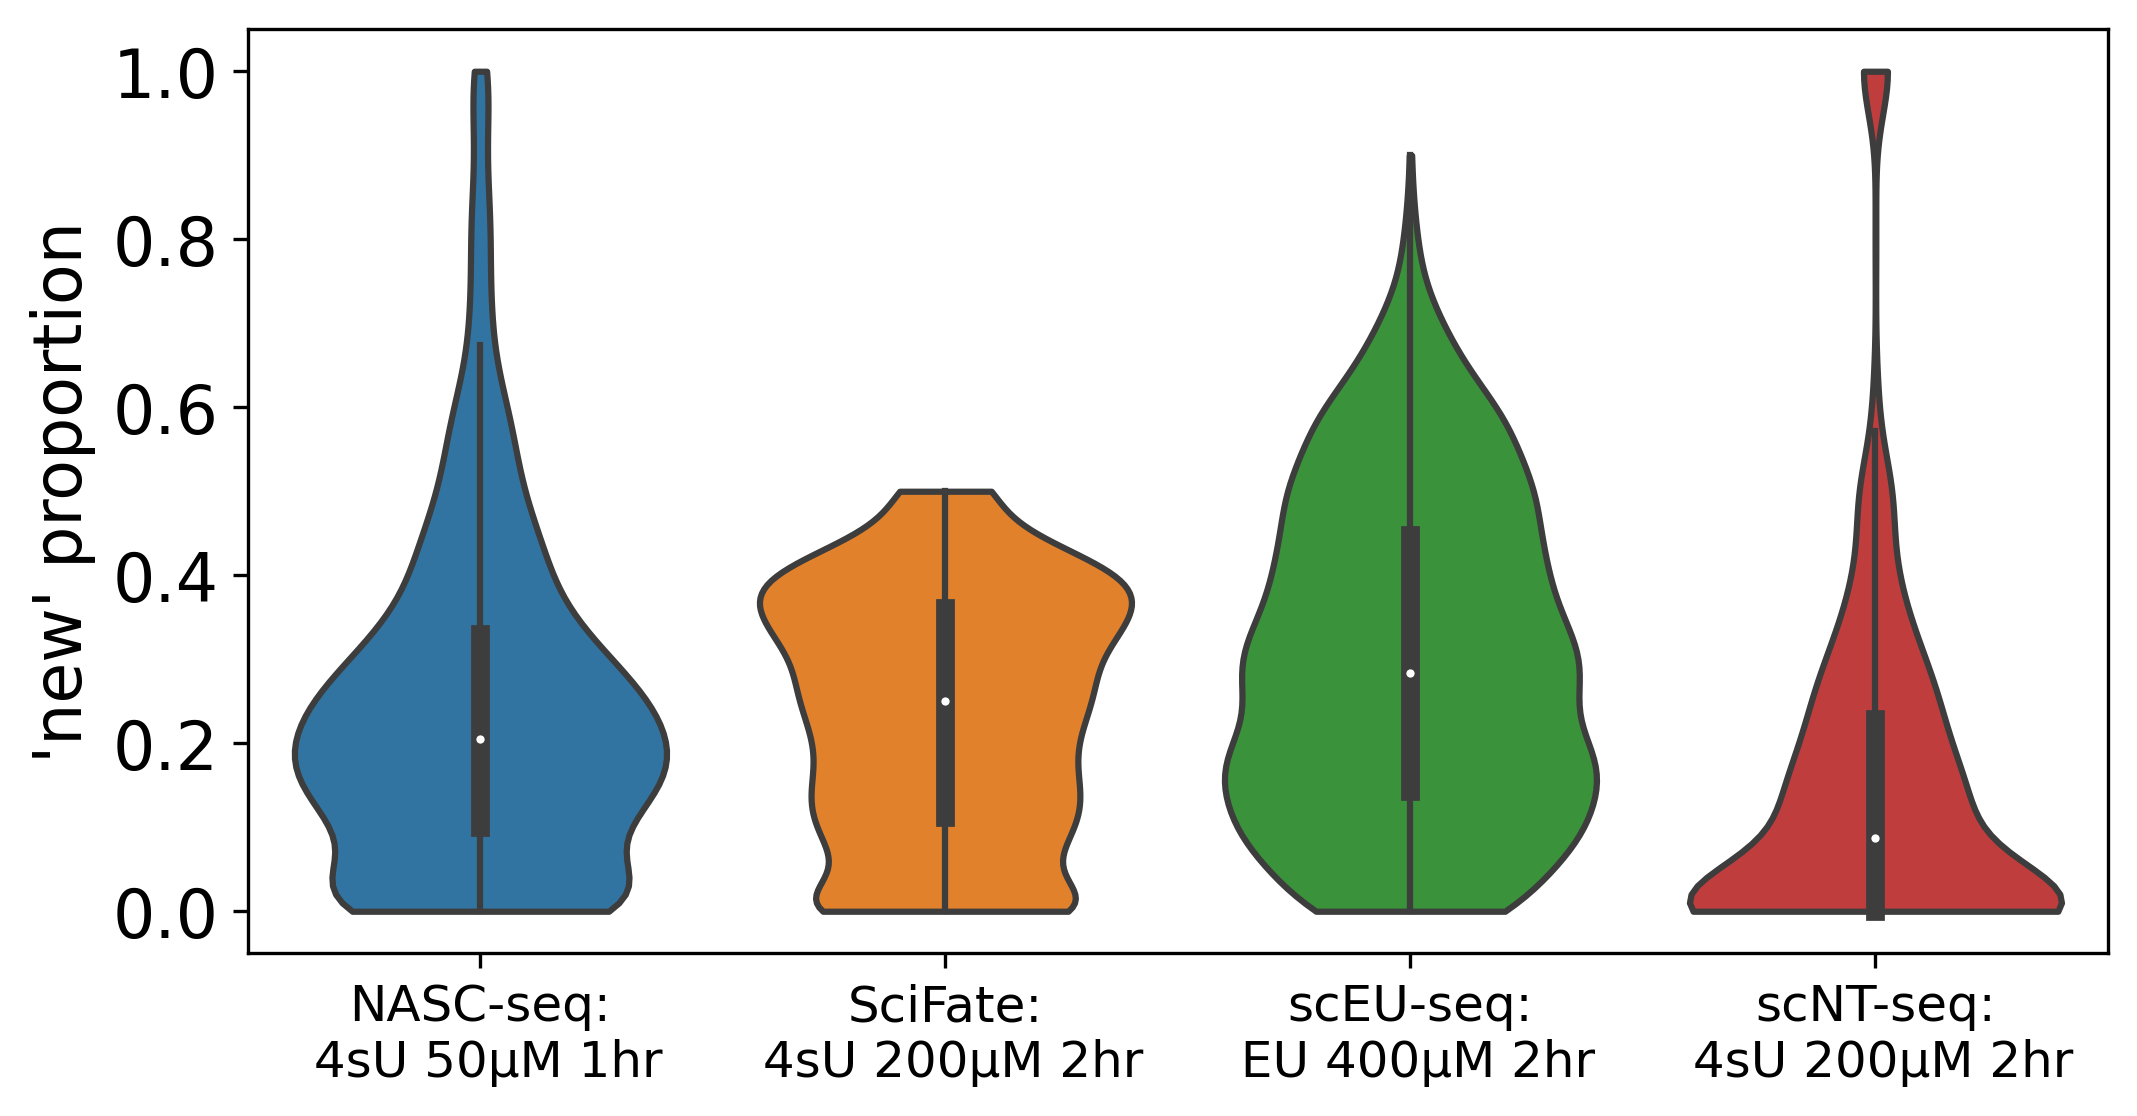

In [55]:
plot_dict = {}
for i, (name, dist) in enumerate(rslt_dict.items()):
    new, old, tot, nz = dist
    if 'RNAV' not in name:
        plot_dict[name.replace(":",":\n")] = new/tot

plt.figure(figsize=(8,4), dpi=300)
sns.violinplot(data=pd.DataFrame(plot_dict), scale='width', cut=0)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel("'new' proportion", fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("5_metlab1.png", bbox_inches='tight')
plt.show()

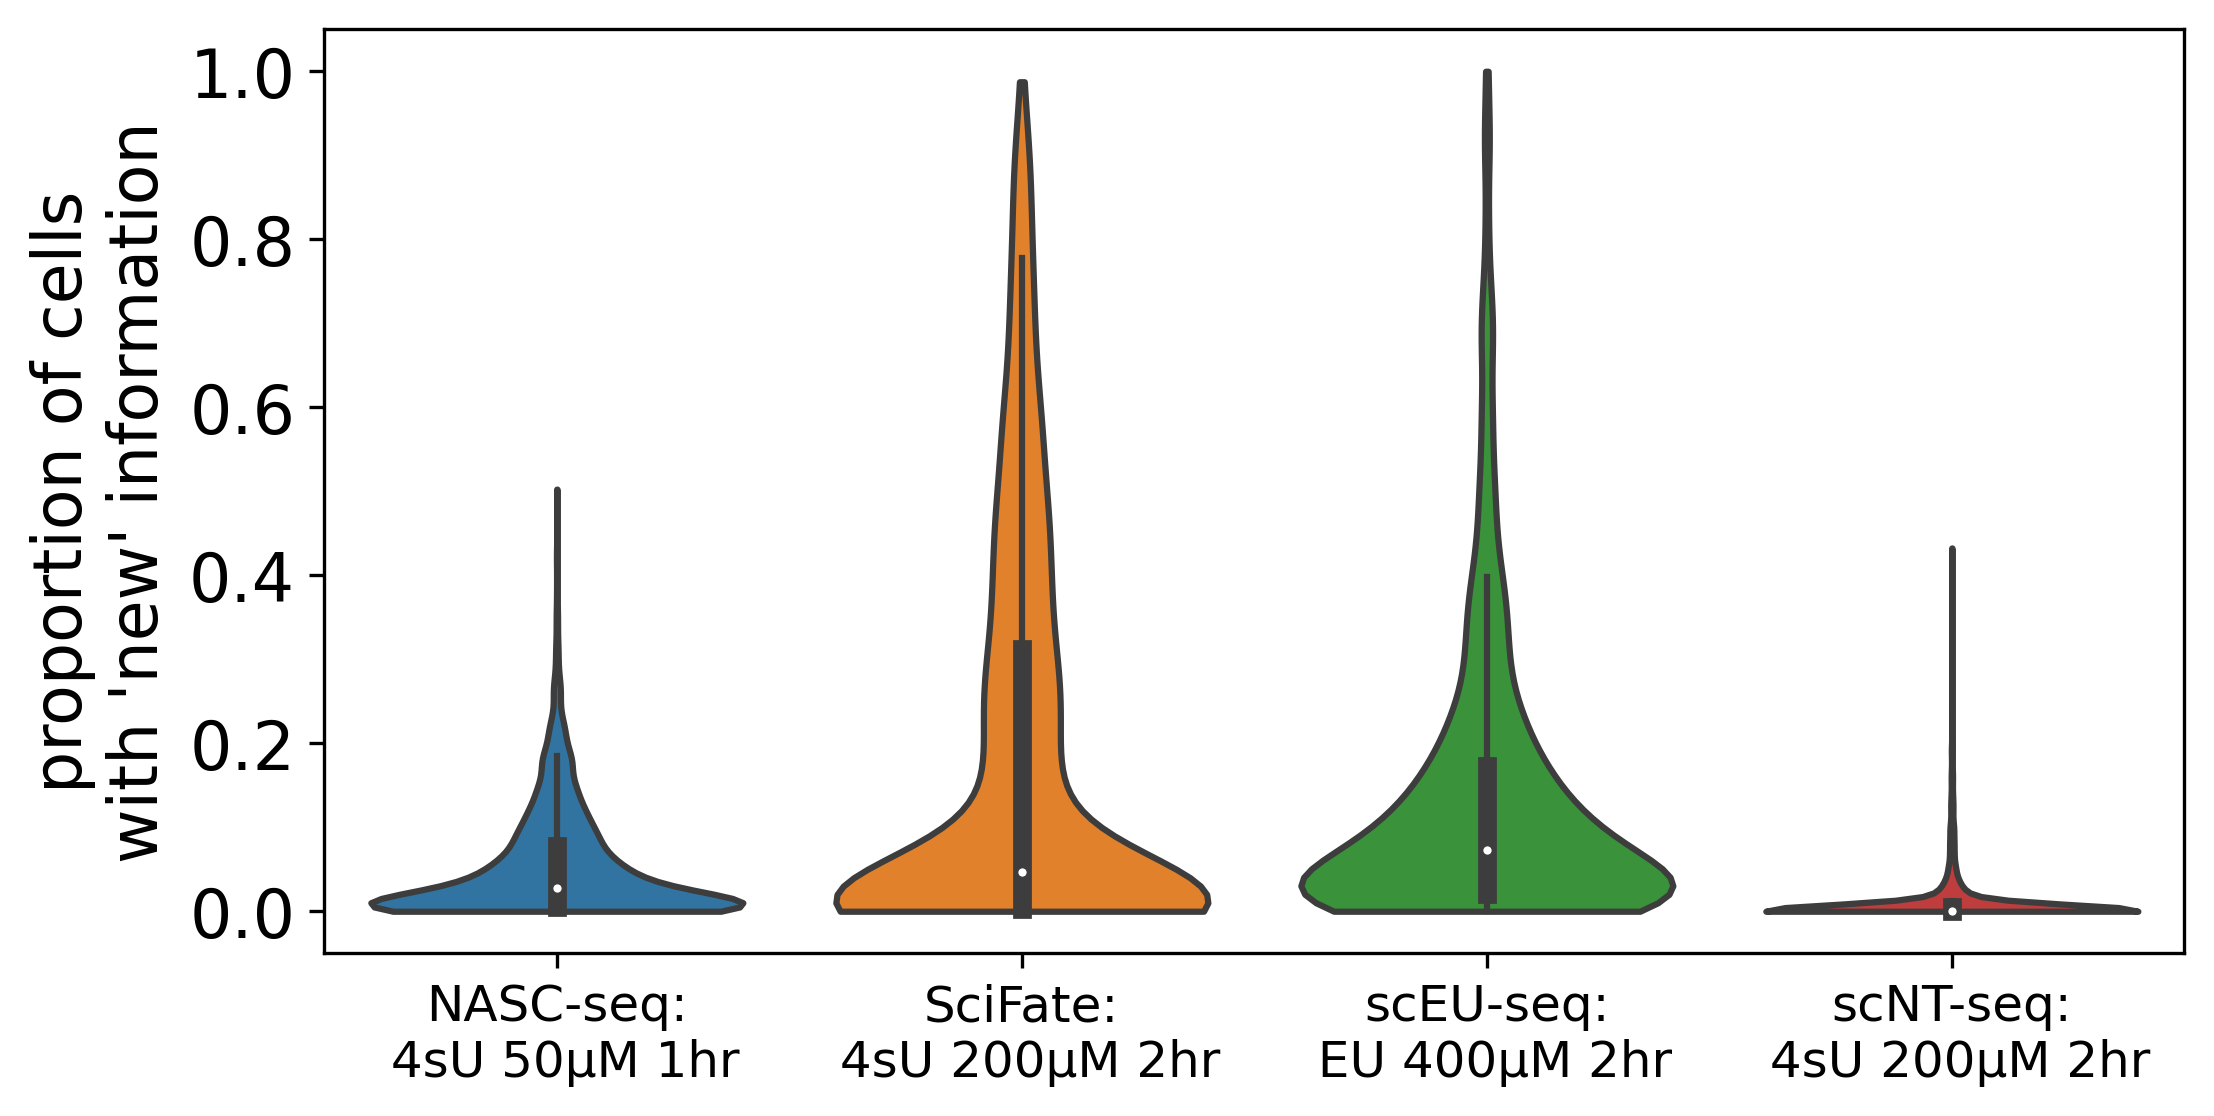

In [57]:
plot_dict = {}
for i, (name, dist) in enumerate(rslt_dict.items()):
    new, old, tot, nz = dist

    if 'RNAV' not in name:
        plot_dict[name.replace(":",":\n")] = nz/400

plt.figure(figsize=(8,4), dpi=300)
sns.violinplot(data=pd.DataFrame(plot_dict), scale='width', cut=0)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel("proportion of cells\nwith 'new' information", fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("5_metlab2.png", bbox_inches='tight')
plt.show()

In [58]:
%%time

sceu_rpe1 = sc.read_loom(home+'sceu/sceu_rpe1.loom')
sceu_rpe1.var_names_make_unique()
sceu_rpe1 = sceu_rpe1[sceu_rpe1.obs.Condition_Id=='Pulse_120']

nasc_seq = sc.read_loom(home+'nasc/nasc_full_data.loom')
nasc_seq.var_names_make_unique()

scif_hek = sc.read_loom(home+'scif/human_labelled_hek.loom')
scif_hek.var_names_make_unique()

scif_a54 = sc.read_loom(home+'scif/scifate_A549_data.loom')
scif_a54.var_names_make_unique()

rnav_mou = sc.read_loom('/nemo/lab/briscoej/home/users/maizelr/transcriptomics/mouse_transcriptomics_data/full_data/mouse_full_typed_velocity.loom')
rnav_mou.var_names_make_unique()

rnav_hum = sc.read_loom('/nemo/lab/briscoej/home/users/maizelr/transcriptomics/human_transcriptomics_analysis/data/human_full_typed_velocity.loom')
rnav_hum.var_names_make_unique()

nt_seq = sc.read_loom(home+'scnt/scnt-data.loom')
nt_seq.var_names_make_unique()


CPU times: user 3min 35s, sys: 52.2 s, total: 4min 27s
Wall time: 5min 8s


In [59]:
datas = [nasc_seq, scif_a54, rnav_mou, rnav_hum, sceu_rpe1, nt_seq]
names = ['NASC-seq: 4sU 50µM 1hr', 'SciFate: 4sU 200µM 2hr', 
         '10x RNAV Mouse', '10x RNAV Human','scEU-seq: EU 400µM 2hr', 'scNT-seq: 4sU 200µM 2hr']
species = ['Human','Human','Mouse','Human','Human', 'Mouse']
labels = ['U','U','Intron','Intron','U','U']

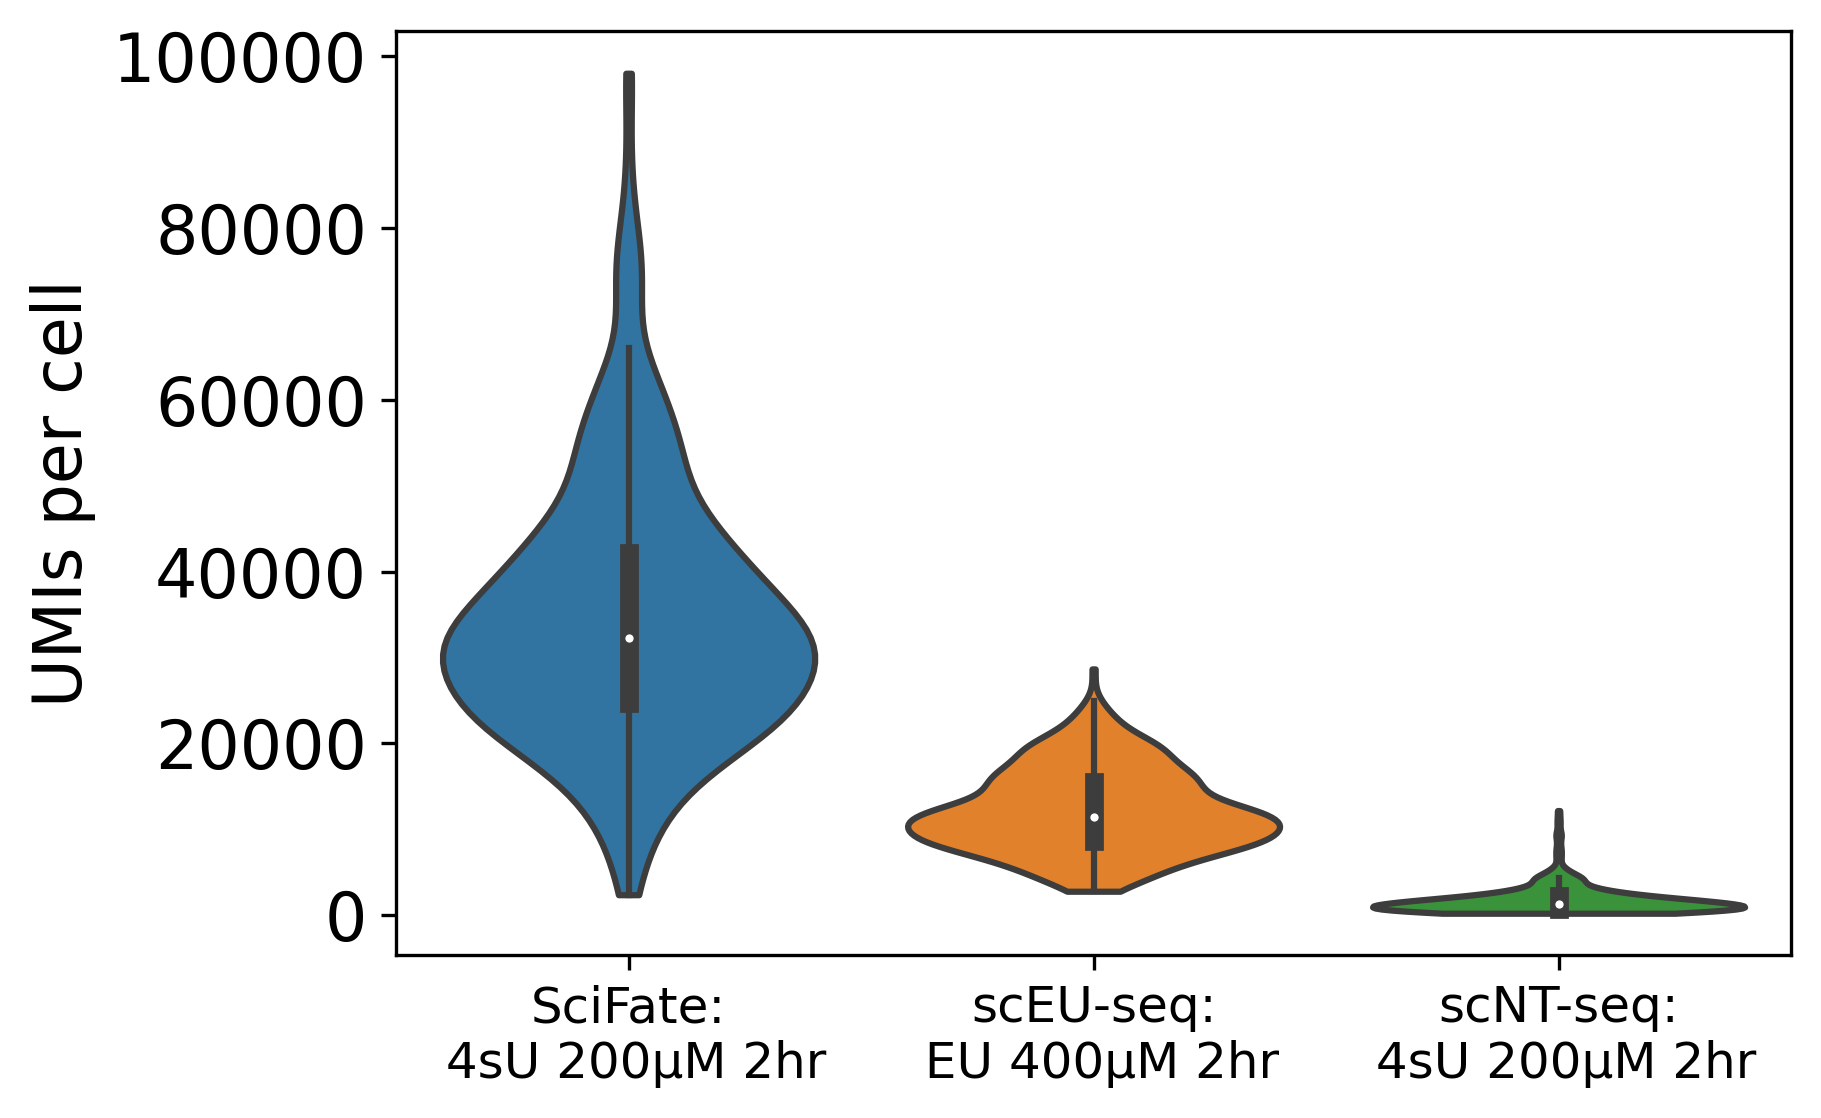

In [80]:
plot_dict = {}
for name, data in zip(names, datas):
    if 'RNAV' not in name:
        if 'NASC' not in name:
            new = data.layers['new'].sum(1)
            old = data.layers['old'].sum(1)
            tot = new + old
            dis = np.array(tot.flatten()).flatten()

            plot_dict[name.replace(":",":\n")] = dis[np.random.choice(dis.shape[0],size=400)]
        
plt.figure(figsize=(6,4), dpi=300)
sns.violinplot(data=pd.DataFrame(plot_dict), scale='width', cut=0)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel("UMIs per cell", fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("5_metlab3.png", bbox_inches='tight')
plt.show()